In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#Reading Shahrukh Khan Films and grouping data based on year of film release | Data from https://boxofficeindia.com/
df = pd.read_excel('Films_by_srk.xlsx')
df['Release Date'] = pd.to_datetime(df['Release Date'])
df = df.groupby(df['Release Date'].dt.year)

#Total films released per year and annual collection 
df['Movie'].count()
srk_data = df['Collections'].sum()
srk_data = srk_data[srk_data.index.values >= 2005]
srk_data

Release Date
2005     13.00
2006     96.75
2007    147.20
2008     86.75
2009     23.65
2010     72.75
2011    237.00
2012    121.00
2013    227.00
2014    204.00
2015    149.00
2016    151.50
2017    190.90
2018     88.50
Name: Collections, dtype: float64

In [3]:
#Reading Amir Khan Films and grouping data based on year of film release | Data from https://boxofficeindia.com/
df = pd.read_excel('Films_by_amir.xlsx')
df['Release Date'] = pd.to_datetime(df['Release Date'].astype(str), errors = 'coerce')
df = df.groupby(df['Release Date'].dt.year)

#Total films released per year and annual collection 
df['Movie'].count()
amir_data = df['Collections (in crore)'].sum()
amir_data = amir_data.replace(amir_data[2016], 375)
amir_data = amir_data[amir_data.index.values >= 2005]
amir_data

Release Date
2005     28.0
2006    107.0
2007     62.0
2008    116.0
2009    202.0
2011     14.0
2012     93.0
2013    285.0
2014    340.0
2016    375.0
2017     62.5
2018    138.5
Name: Collections (in crore), dtype: float64

In [4]:
#Reading Salman Khan Films and grouping data based on year of film release | Data from https://boxofficeindia.com/
df = pd.read_excel('Flms_by_salman.xlsx')
df['NETT GROSS'] = df['NETT GROSS'] / (10**7)
df['RELEASE DATE']  = pd.to_datetime(df['RELEASE DATE'])
df.sort_values('RELEASE DATE', inplace = True)
df = df.groupby(df['RELEASE DATE'].dt.year)

#Total films released per year and annual collection 
df['Unnamed: 2'].count()
salman_data = df['NETT GROSS'].sum()
salman_data = salman_data[salman_data.index.values >= 2005]
salman_data

RELEASE DATE
2005     99.0500
2006     44.3475
2007    104.5530
2008     29.4000
2009     93.3315
2010    179.3850
2011    265.5025
2012    335.6650
2014    320.9850
2015    509.7950
2016    300.6725
2017    453.5700
2018    166.1525
2019    332.1350
Name: NETT GROSS, dtype: float64

<IPython.core.display.Javascript object>


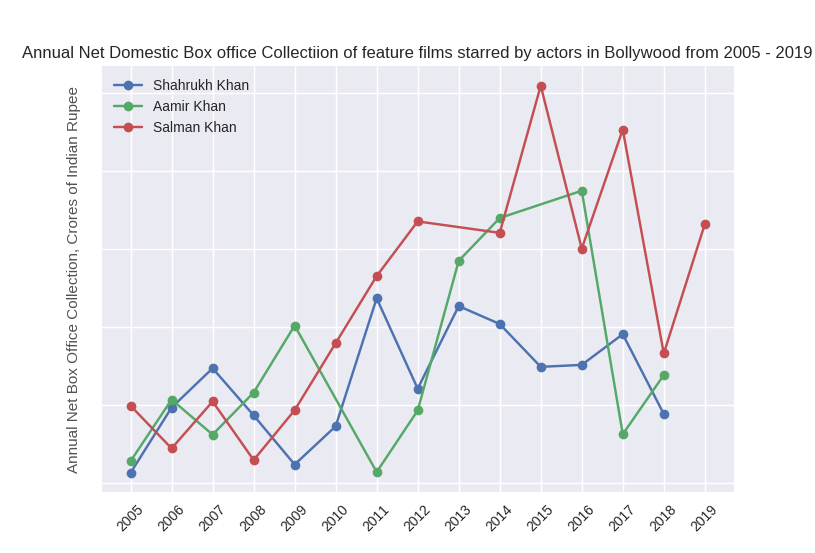

In [9]:
#plot 3 lines
fig,ax = plt.subplots()
line1, = plt.plot(srk_data.index.values, srk_data.values, marker = 'o', label = 'Shahrukh Khan')
line2, = plt.plot(amir_data.index.values, amir_data.values, '-o', label = 'Aamir Khan')
line3, = plt.plot(salman_data.index.values, salman_data.values, '-o', label = 'Salman Khan')

#increase tick frequency
plt.xticks(np.arange(2005, 2020, 1), rotation = 45)

#Add title and labels
plt.ylabel('Annual Net Box Office Collection, Crores of Indian Rupee', labelpad = 15, alpha=0.8)
#plt.xlabel('Years form 2005 - 2019', labelpad = 15, alpha=0.8)
plt.title('Annual Net Domestic Box office Collectiion of feature films starred by actors in Bollywood from 2005 - 2019')


# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

plt.legend()

plt.show()

In [10]:
#Incorporate interaction, display data when user hovers over it 
annot = ax.annotate("", xy=(0,0), xytext=(-20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(event, ind, data, line):
    x,y = line.get_data()
    annot.xy = (x[ind["ind"][0]], y[ind["ind"][0]])
    year = int(event.xdata)
    text = "{}\nRs:{}Crore".format(year, int(data.loc[year]))
    
    annot.set_text(text)
    annot.get_bbox_patch().set_alpha(0.7)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont1, ind1 = line1.contains(event)
        cont2, ind2 = line2.contains(event)
        cont3, ind3 = line3.contains(event)
        if cont1:
            update_annot(event, ind1, srk_data, line1)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        elif cont2:
            update_annot(event, ind2, amir_data, line2)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        elif cont3:
            update_annot(event, ind3, salman_data, line3)
            annot.set_visible(True)
            fig.canvas.draw_idle()            
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

7

In [15]:
help(plt.title)

Help on function title in module matplotlib.pyplot:

title(s, *args, **kwargs)
    Set a title of the current axes.
    
    Set one of the three available axes titles. The available titles are
    positioned above the axes in the center, flush with the left edge,
    and flush with the right edge.
    
    .. seealso::
        See :func:`~matplotlib.pyplot.text` for adding text
        to the current axes
    
    Parameters
    ----------
    label : str
        Text to use for the title
    
    fontdict : dict
        A dictionary controlling the appearance of the title text,
        the default `fontdict` is:
    
            {'fontsize': rcParams['axes.titlesize'],
            'fontweight' : rcParams['axes.titleweight'],
            'verticalalignment': 'baseline',
            'horizontalalignment': loc}
    
    loc : {'center', 'left', 'right'}, str, optional
        Which title to set, defaults to 'center'
    
    Returns
    -------
    text : :class:`~matplotlib.text.Text`
